In [44]:
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import scipy.io as sio
import biosppy 
from statsmodels.tsa.stattools import adfuller
from scipy.ndimage import shift

In [45]:
df = pandas.read_csv('EMG-data.csv')
df

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4237902,50962,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237903,50963,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237904,50964,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237905,50965,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36


PUNTO1

In [69]:
def TKEO(señal):
      
      # Calcula el atraso y el adelanto de la señal utilizando la función shift
     atraso=shift(señal,1,cval=0) # Atraso un paso
     adelanto=shift(señal,-1,cval=0) # Adelanto un paso
     
     # Calcula el TKEO de la señal utilizando la fórmula del operador
     return((señal**2)-atraso*adelanto)

PUNTO2

In [68]:

def TKEOch(df,sujeto):
     
     # Obtener los canales del DataFrame
    canales=df.columns.values[1:9] 
    
    # Iterar sobre cada canal
    for i in range(canales.size):
         
         # Seleccionar el tiempo y la señal del canal para el sujeto especificado
        tiempo=df.loc[df["label"]==sujeto,"time"]
        suj1=df.loc[df["label"]==sujeto,canales[i]]
        
        # Calcular el TKEO para cada señal del sujeto dado
        return(TKEO(suj1))
    
        #plt.figure(figsize=(12,30))
        #plt.subplot(37,1,i+1)
        #plt.plot(tiempo,TKEO(suj1),linewidth=0.5,color=(0.2,0.1,0.4))
        #plt.title("Subject: "+ str(sujeto) + "   Channel: " + str(i+1))
        #plt.xlabel('Tiempo', fontsize=10)
        #plt.ylabel('Amplitud', fontsize=10)

In [ ]:
TKEOch(df,12)

In [67]:
def RMS(s):
  N=len(s) # Obtener la longitud de la señal
  return ((1/N)*sum(s**2))**0.5 # Calcular RMS utilizando la fórmula: sqrt((1/N) * sum(s^2))

def mean_absolute_value(s):
    N=len(s)
    return ((1/N)*sum(abs(s))) # Calcular el valor absoluto promedio utilizando la fórmula: (1/N) * sum(abs(s))

def mean_absolute_value_slope(signal):
     # Calcular la diferencia entre valores consecutivos en la señal
     # Calcular el valor absoluto promedio de las diferencias
    return np.mean(np.abs(np.diff(signal)))

def slope_sign_changes(signal):
    # Calcular la diferencia entre valores consecutivos en la señal
    # Calcular el signo de las diferencias consecutivas
    # Calcular el número de cambios en el signo de la pendiente
    return np.sum(np.diff(np.sign(np.diff(signal))) != 0)

def waveform_length(signal):
    # Calcular la suma de los valores absolutos de las diferencias
    return np.sum(np.abs(np.diff(signal)))

def zero_crossing(signal):
    # Calcular el número de cruces por cero contando los cambios de signo
    return np.sum(np.diff(np.sign(signal)) != 0)


PUNTO3

In [70]:
def METRICASch(df,sujeto):
    
    # Obtener los canales del DataFrame
    canales=df.columns.values[1:9]
    
     # Iterar sobre cada canal
    for i in range(canales.size):
        
        # Seleccionar el tiempo y la señal del canal para el sujeto especificado
        tiempo=df.loc[df["label"]==sujeto,"time"]
        suj1=df.loc[df["label"]==sujeto,canales[i]]
        
        print("CANAL "+str(i+1)+" / PACIENTE "+str(sujeto))
        
        # Calcular y mostrar las métricas para el canal 
        print("RMS: "+str(RMS(suj1)))
        print("varianza: "+str(np.var(suj1)))
        print("mean absolute value: "+str(mean_absolute_value(suj1)))
        print("mean absolute value slope: "+str(mean_absolute_value_slope(suj1)))
        print("slope sign changes: "+str(slope_sign_changes(suj1)))
        print("waveform lenght: "+str(waveform_length(suj1)))
        print("zero crossing: "+str(zero_crossing(suj1)))
        print("--------------------------------------------")
        
        #plt.figure(figsize=(12,30))
        #plt.subplot(37,1,i+1)
        #plt.plot(tiempo,TKEO(suj1),linewidth=0.5,color=(0.2,0.1,0.4))
        #plt.title("Subject: "+ str(sujeto) + "   Channel: " + str(i+1))
        #plt.xlabel('Tiempo', fontsize=10)
        #plt.ylabel('Amplitud', fontsize=10)

In [ ]:
METRICASch(df,12)

PUNTO4

In [72]:
def punto4(df,sujeto):
    """Devuelve las metricas de la señal EMG de cada canal una vez aplicado el operador TKEO"""
    # Obtener los canales del DataFrame
    canales=df.columns.values[1:9]
    
    # Iterar sobre cada canal
    for i in range(canales.size):
        
        # Seleccionar el tiempo y la señal del canal para el sujeto especificado
        tiempo=df.loc[df["label"]==sujeto,"time"]
        suj1=df.loc[df["label"]==sujeto,canales[i]]
        
        # Aplicar operador a la señal
        suj1=TKEO(suj1)
        print("CANAL "+str(i+1)+"/PACIENTE "+str(sujeto))
        
        # Calcular y mostrar las métricas para el canal con operador TKEO
        print("RMS: "+str(RMS(suj1)))
        print("varianza: "+str(np.var(suj1)))
        print("mean absolute value: "+str(mean_absolute_value(suj1)))
        print("mean absolute value slope: "+str(mean_absolute_value_slope(suj1)))
        print("slope sign changes: "+str(slope_sign_changes(suj1)))
        print("waveform lenght: "+str(waveform_length(suj1)))
        print("zero crossing: "+str(zero_crossing(suj1)))
        print("--------------------------------------------")




In [ ]:
# Iterar sobre los 36 sujetos empleando la función punto4
for i in range(1,37):
    punto4(df,i)
    

PUNTO5

In [ ]:
# Iterar sobre los 36 sujetos empleando la función METRICASch (sin TKEO)
for i in range(1,37):
    METRICASch(df,i)
    
    

PUNTO6

In [73]:
# Se inicializa un diccionario vacío para almacenar las métricas
dic2 = {}

def punto6(df, sujeto):
    # Se obtienen los nombres de los canales del DataFrame
    canales = df.columns.values[1:9]
    
    # Iterar sobre cada canal
    for i in range(canales.size):
        # Seleccionar el tiempo y la señal del canal para el sujeto especificado
        tiempo = df.loc[df["label"] == sujeto, "time"]
        suj1 = df.loc[df["label"] == sujeto, canales[i]]
        
        # Se aplica el operador TKEO a la señal
        suj1 = TKEO(suj1)

        # Se almacenan las métricas en el diccionario
        dic2["TKEO"] = [1]
        dic2["RMS_C" + str(i + 1)] = [RMS(suj1)]
        dic2["var_C" + str(i + 1)] = [np.var(suj1)]
        dic2["mav_C" + str(i + 1)] = [mean_absolute_value(suj1)]
        dic2["mavs_C" + str(i + 1)] = [mean_absolute_value_slope(suj1)]
        dic2["ssc_C" + str(i + 1)] = [slope_sign_changes(suj1)]
        dic2["wl_C" + str(i + 1)] = [waveform_length(suj1)]
        dic2["zc_C" + str(i + 1)] = [zero_crossing(suj1)]

# Se crea un DataFrame vacío para almacenar los resultados
output = pandas.DataFrame()

# Se itera sobre todos los sujetos
for i in range(1, 37):
    # Se limpia el diccionario para cada sujeto
    dic2 = {}
    # Se calculan las métricas para el sujeto actual
    punto6(df, i)
    # Se crea un DataFrame a partir del diccionario y se concatena al DataFrame de salida
    df_dictionary = pandas.DataFrame([dic2])
    output = pandas.concat([output, df_dictionary], ignore_index=True)

# Se crea un diccionario para los índices de los sujetos
dic_index = {"sujetos": []}
for i in range(1, 37):
    dic_index["sujetos"].append("sujeto" + str(i))

In [74]:
output.index=(dic_index["sujetos"])
output

,TKEO,RMS_C1,var_C1,mav_C1,mavs_C1,ssc_C1,wl_C1,zc_C1,RMS_C2,var_C2,...,ssc_C7,wl_C7,zc_C7,RMS_C8,var_C8,mav_C8,mavs_C8,ssc_C8,wl_C8,zc_C8
sujeto1,[1],[3.967103557754283e-08],[1.5621227813647482e-15],[3.906590740282253e-09],[5.760445328425591e-09],[87493],[0.0006979874000000004],[34141],[3.688947790039822e-08],[1.3507227123624932e-15],...,[88113],[0.0005410552000000003],[34409],[3.7516756745823084e-08],[1.3975606107077028e-15],[3.6481373277213884e-09],[5.369503750959406e-09],[87542],[0.0006506174000000003],[33962]
sujeto2,[1],[6.87300949198621e-08],[4.701097950634624e-15],[5.3462771026050814e-09],[7.52504159794759e-09],[99622],[0.0010266038000000001],[39591],[1.0204126616514713e-08],[1.0358870574304864e-16],...,[100119],[0.0008825950000000003],[39031],[2.8055072587927612e-08],[7.827339658589835e-16],[2.3764194508378196e-09],[3.5517089976177405e-09],[99896],[0.00048454190000000026],[39075]
sujeto3,[1],[8.563046863677953e-08],[7.217671365008531e-15],[1.2295090986434764e-08],[1.7658833093851634e-08],[77180],[0.001868022000000001],[30463],[1.2236338729368135e-07],[1.4750398952354074e-14],...,[77736],[0.0012459418000000007],[30507],[5.343524002909909e-08],[2.816468319067121e-15],[7.208520111547015e-09],[1.017286168040536e-08],[77283],[0.0010761260000000006],[30071]
sujeto4,[1],[7.550818999451597e-08],[5.614797559565908e-15],[1.0714866284873655e-08],[1.5696557702916898e-08],[84110],[0.001792499800000001],[32678],[2.1573042534747574e-08],[4.59427560681455e-16],...,[84193],[0.0005458166000000003],[31792],[3.084086133400954e-08],[9.40464044394023e-16],[3.750951855549139e-09],[5.415854181808632e-09],[84059],[0.0006184743000000004],[31948]
sujeto5,[1],[2.7785253505414294e-08],[7.686516732515333e-16],[2.1017361629121316e-09],[3.126904249069906e-09],[77873],[0.0003353511000000002],[30416],[1.7621414133651994e-08],[3.0938839294768027e-16],...,[77810],[0.0004255504000000001],[30245],[3.0738752045462053e-08],[9.3755268903142e-16],[3.0876146874533825e-09],[4.588882672708796e-09],[78196],[0.0004921439000000002],[30786]
sujeto6,[1],[5.6004090564793217e-08],[3.111724364496553e-15],[5.615890542968717e-09],[7.94587223192596e-09],[73548],[0.0007915519000000003],[28189],[1.1683337168796986e-08],[1.3462691024477942e-16],...,[73402],[0.00031522480000000007],[27883],[3.538207038383571e-08],[1.2389577121591353e-15],[4.123615976871887e-09],[5.907005762010885e-09],[73331],[0.0005884441000000003],[28461]
sujeto7,[1],[3.2839038835699705e-08],[1.0638138960099513e-15],[4.361230398069969e-09],[6.415464531548038e-09],[98041],[0.0008509408000000003],[36488],[4.395547483640791e-09],[1.9066851014231524e-17],...,[96574],[0.0005754928000000001],[37790],[9.570390430584212e-08],[9.069542248084734e-15],[1.0878132539203872e-08],[1.552921086558253e-08],[96895],[0.002059779000000001],[38592]
sujeto8,[1],[7.191086709771581e-08],[5.108169620566965e-15],[9.10153203106455e-09],[1.327752465090253e-08],[86789],[0.0015660442000000007],[34237],[3.0042529823498804e-08],[8.913837170452347e-16],...,[86968],[0.0024643754000000014],[33875],[8.165836806174497e-08],[6.5721940572234605e-15],[1.135561264285958e-08],[1.6628681526448328e-08],[86732],[0.001961303100000001],[34278]
sujeto9,[1],[3.361762477289e-08],[1.1196669340888286e-15],[3.6920687521054204e-09],[5.39891810162481e-09],[91886],[0.0006891503000000005],[37041],[2.481470502855488e-08],[6.122534825127103e-16],...,[92235],[0.0004415956000000002],[36776],[6.010649051900812e-08],[3.5824360737911415e-15],[6.380773539526985e-09],[9.330489008664591e-09],[92319],[0.0011909996000000005],[37069]
sujeto10,[1],[2.6951985330936372e-08],[7.203085823761277e-16],[2.8551503383730506e-09],[4.149113642272198e-09],[89644],[0.0005107061000000002],[35521],[5.8808535240009585e-09],[3.410484402882565e-17],...,[89350],[0.0013832184000000009],[36468],[3.633815219001219e-08],[1.3114706125130674e-15],[3.4787885188765892e-09],[5.1127291043806084e-09],[89619],[0.0006293156000000003],[35954]


In [75]:
dic2 = {}  # Se inicializa un diccionario vacío para almacenar las métricas

def punto5(df, sujeto):
  
    canales = df.columns.values[1:9]  # Se obtienen los nombres de los canales del DataFrame
    
    # Itera sobre cada canal
    for i in range(canales.size):
        # Selecciona el tiempo y la señal del canal para el sujeto especificado
        tiempo = df.loc[df["label"] == sujeto, "time"]
        suj1 = df.loc[df["label"] == sujeto, canales[i]]
        
        # Calcula y almacena las métricas en el diccionario
        dic2["TKEO"] = [0]  # Aquí se coloca un valor ficticio para "TKEO"
        dic2["RMS_C" + str(i + 1)] = [RMS(suj1)]
        dic2["var_C" + str(i + 1)] = [np.var(suj1)]
        dic2["mav_C" + str(i + 1)] = [mean_absolute_value(suj1)]
        dic2["mavs_C" + str(i + 1)] = [mean_absolute_value_slope(suj1)]
        dic2["ssc_C" + str(i + 1)] = [slope_sign_changes(suj1)]
        dic2["wl_C" + str(i + 1)] = [waveform_length(suj1)]
        dic2["zc_C" + str(i + 1)] = [zero_crossing(suj1)]

# Se crea un DataFrame vacío para almacenar los resultados
output2 = pandas.DataFrame()

# Se itera sobre todos los sujetos
for i in range(1, 37):
    dic2 = {}  # Se limpia el diccionario para cada sujeto
    punto5(df, i)  # Se calculan las métricas para el sujeto actual
    df_dictionary2 = pandas.DataFrame([dic2])  # Se crea un DataFrame a partir del diccionario
    output2 = pandas.concat([output2, df_dictionary2], ignore_index=True)  # Se concatena al DataFrame de salida

In [79]:
output2.index=(dic_index["sujetos"])
output2

,TKEO,RMS_C1,var_C1,mav_C1,mavs_C1,ssc_C1,wl_C1,zc_C1,RMS_C2,var_C2,...,ssc_C7,wl_C7,zc_C7,RMS_C8,var_C8,mav_C8,mavs_C8,ssc_C8,wl_C8,zc_C8
sujeto1,[0],[0.00013549047102855423],[1.8295801991380173e-08],[6.870578526037798e-05],[1.0408272743028335e-05],[17995],[1.2611600000000003],[7019],[0.00013240151096432663],[1.7450432612180343e-08],...,[17689],[1.1281800000000002],[6691],[0.0001335546391087391],[1.775993320033936e-08],[6.988470743583396e-05],[1.009829246754533e-05],[17697],[1.2236],[6681]
sujeto2,[0],[0.00015434263776462884],[2.377706519323348e-08],[6.287042059431487e-05],[9.919003115264797e-06],[21603],[1.3532],[8673],[5.949183504197558e-05],[3.4412854746087457e-09],...,[21742],[1.5121999999999998],[8326],[0.00010436137749883071],[1.0803302520884075e-08],[5.0755354551185257e-05],[7.798204141469673e-06],[21449],[1.06387],[8277]
sujeto3,[0],[0.00023600380605825035],[5.557666229680256e-08],[0.00012881788533345936],[2.1491529910005288e-05],[17243],[2.2734599999999996],[6920],[0.0002749887071377085],[7.560822171389023e-08],...,[17244],[1.8684999999999998],[6645],[0.00017807352702621436],[3.158954781444774e-08],[9.750371035591056e-05],[1.5987483929516747e-05],[17217],[1.6912199999999997],[6736]
sujeto4,[0],[0.00023390109760913408],[5.468671962992232e-08],[0.00012954447538485788],[1.7747226284403265e-05],[18094],[2.02668],[6231],[0.00011358530602454286],[1.2803573631385358e-08],...,[17857],[1.0991],[6275],[0.00013535645173292347],[1.824658025903e-08],[7.647848473703566e-05],[1.0600541170083277e-05],[18000],[1.21055],[6251]
sujeto5,[0],[9.828339781843768e-05],[9.573307273307755e-09],[4.685364762046845e-05],[7.351907279457701e-06],[16658],[0.78847],[6432],[7.16287802300376e-05],[5.032903753818227e-09],...,[16569],[1.02712],[6099],[0.00011922986091767139],[1.412635033838675e-08],[5.984577800984633e-05],[9.395787294749504e-06],[16524],[1.00767],[6288]
sujeto6,[0],[0.00015557793262150824],[2.4138764987578917e-08],[8.07588913761431e-05],[1.276646790740629e-05],[16002],[1.2717699999999998],[6025],[8.47088306057502e-05],[7.084274441649144e-09],...,[15848],[0.92134],[5918],[0.00013416151975880795],[1.791416928104889e-08],[7.612082032543992e-05],[1.1963400188720914e-05],[15792],[1.19177],[5870]
sujeto7,[0],[0.00014148624388073523],[1.9953690825610804e-08],[8.442046139927624e-05],[1.3849923476503898e-05],[21961],[1.8370400000000005],[8490],[5.267539201567298e-05],[2.6658074472555846e-09],...,[20888],[1.2664000000000002],[8345],[0.00022083344125297985],[4.869991605973537e-08],[0.00010253731905910735],[1.6633116956551243e-05],[21222],[2.2062000000000004],[8407]
sujeto8,[0],[0.00020753349429211321],[4.2990508627487877e-08],[0.00011141977820734562],[1.7034769854256573e-05],[18806],[2.0092],[7133],[0.00013728908974689028],[1.8680650200659605e-08],...,[18607],[2.5090200000000005],[6795],[0.00023343167798967762],[5.4358515651813616e-08],[0.0001244624749889782],[1.877665392082885e-05],[18510],[2.2146500000000002],[6886]
sujeto9,[0],[0.00012803516454799066],[1.6303427346709552e-08],[6.495467970261738e-05],[1.050303182238378e-05],[19419],[1.3406699999999998],[7854],[9.824923975248626e-05],[9.55565943187092e-09],...,[19192],[1.079],[7496],[0.00017441711025826154],[3.035602394213964e-08],[7.933198586727459e-05],[1.2234930980994314e-05],[19283],[1.5617400000000001],[7501]
sujeto10,[0],[0.00011264282106617296],[1.2621261007488506e-08],[5.753227339567305e-05],[9.650250227479529e-06],[20001],[1.1878300000000002],[8188],[5.801231834508553e-05],[3.273422567144872e-09],...,[19468],[1.6949599999999998],[7736],[0.00012361306213924756],[1.5218931984557465e-08],[5.8694440608015335e-05],[9.870986611204993e-06],[19576],[1.215],[7802]


PUNTO7

media: 4.285135185779164e-08/mediana: 3.967103557754283e-08
media: 1.9633429657046925e-15/mediana: 1.5621227813647482e-15
media: 4.459947653238078e-09/mediana: 3.906590740282253e-09
media: 6.514902562300828e-09/mediana: 5.760445328425591e-09
media: 88029.57142857143/mediana: 88113.0
media: 0.000789404228571429/mediana: 0.0006979874000000004
media: 33763.71428571428/mediana: 33968.0


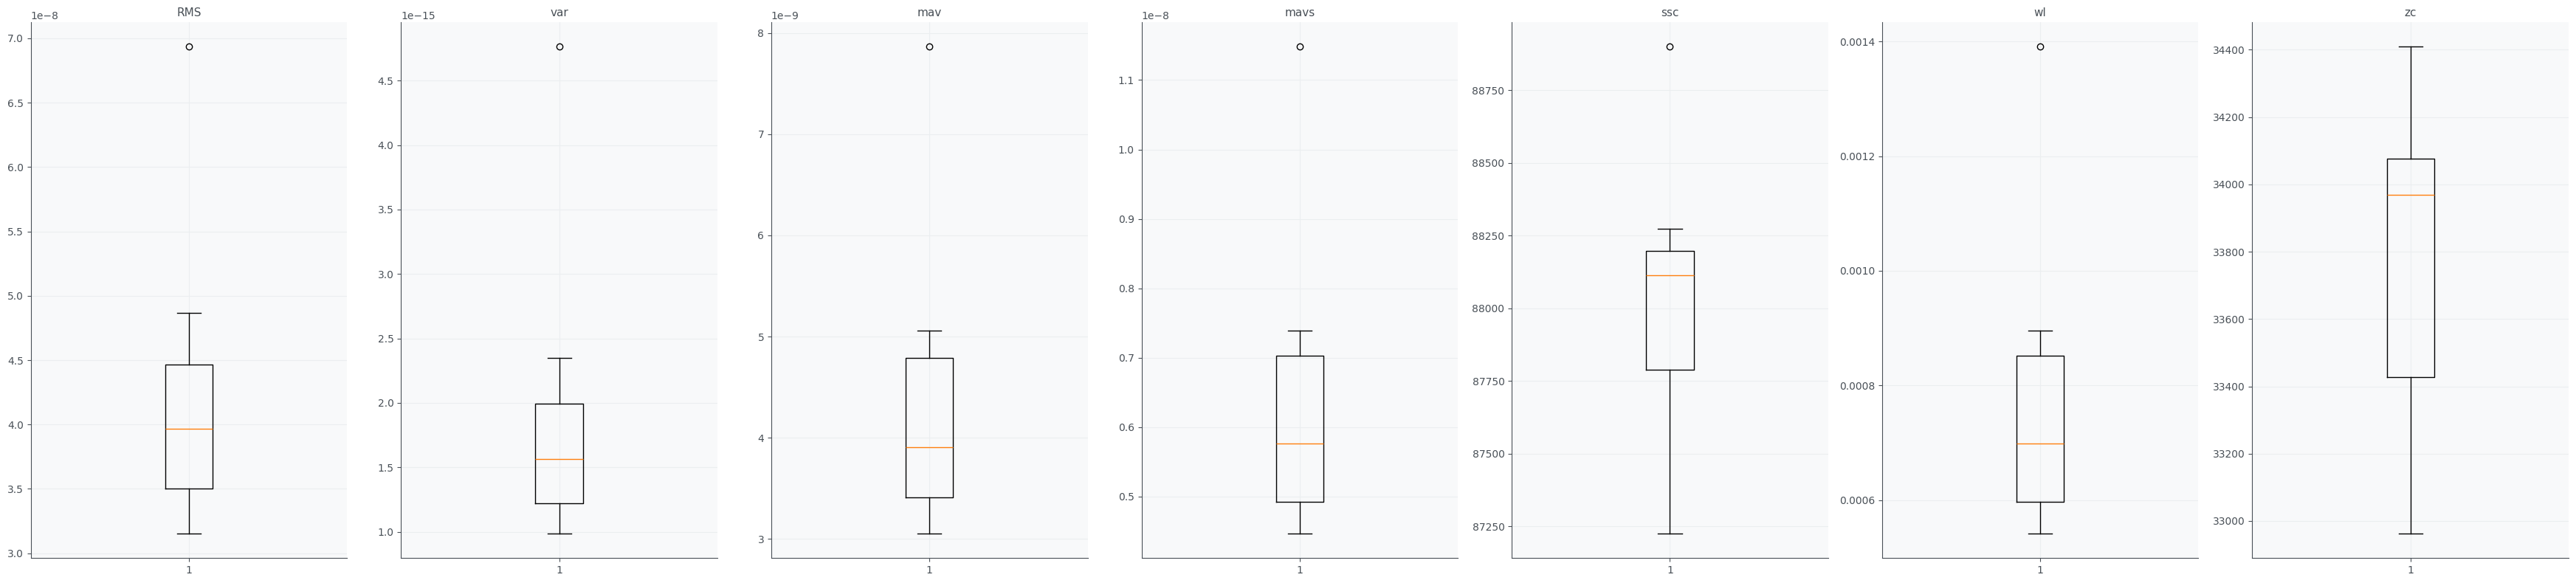

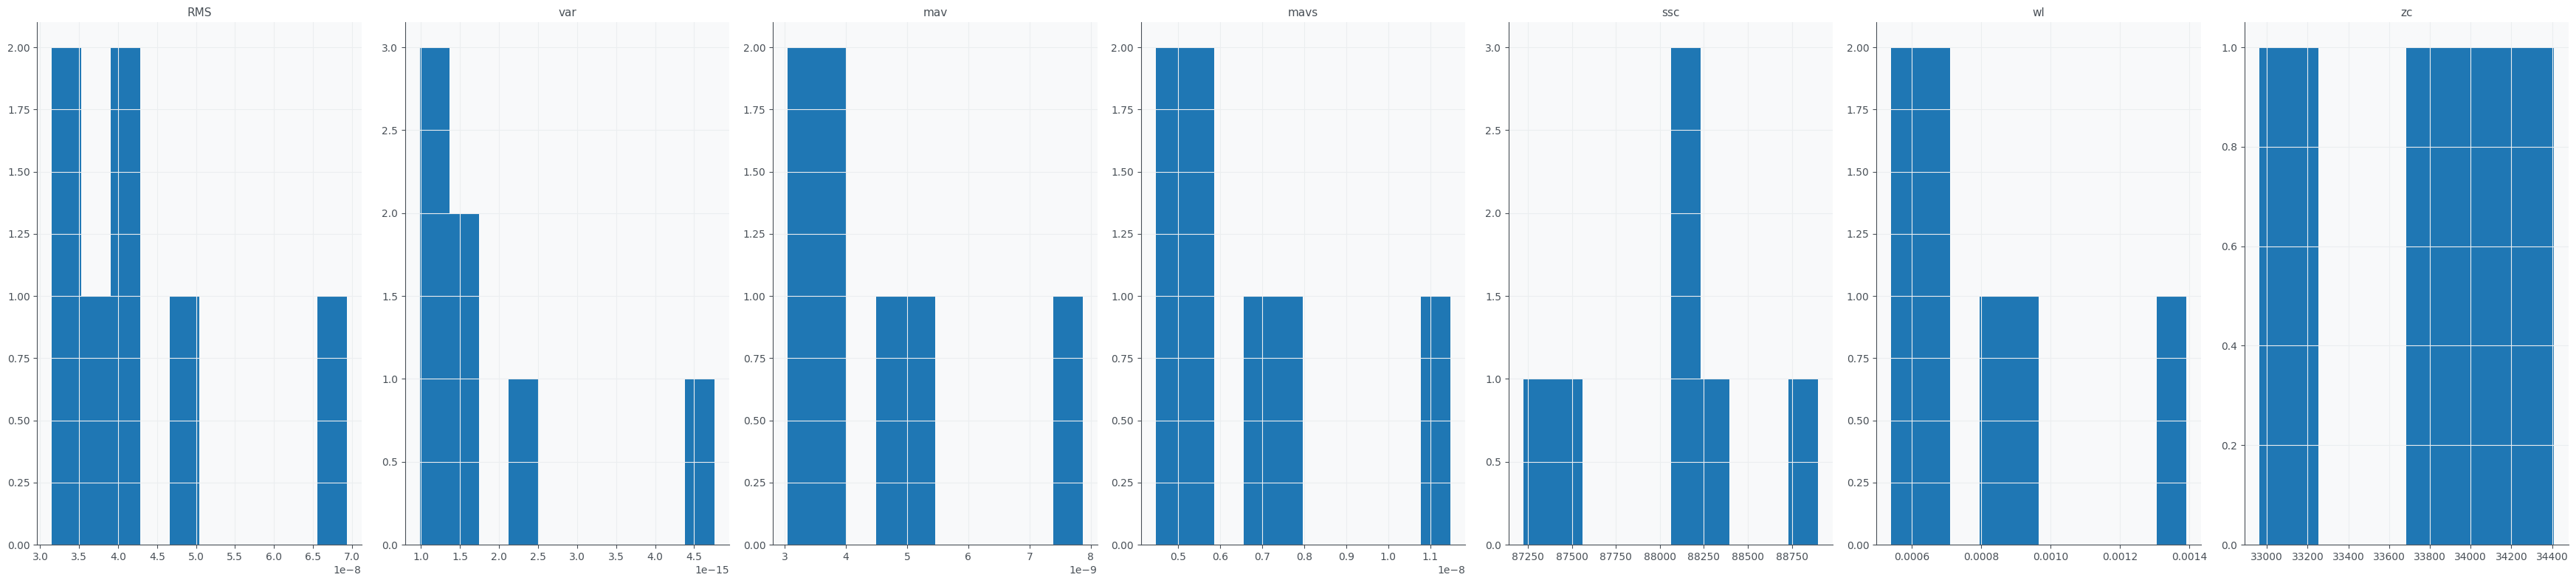

In [88]:
# Con operador TKEO
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
for i in range(1,8):
    s1=output.loc["sujeto1","RMS_C"+str(i)]
    list1.append(s1)
    s2=output.loc["sujeto1","var_C"+str(i)]
    list2.append(s2)
    s3=output.loc["sujeto1","mav_C"+str(i)]
    list3.append(s3)
    s4=output.loc["sujeto1","mavs_C"+str(i)]
    list4.append(s4)
    s5=output.loc["sujeto1","ssc_C"+str(i)]
    list5.append(s5)
    s6=output.loc["sujeto1","wl_C"+str(i)]
    list6.append(s6)
    s7=output.loc["sujeto1","zc_C"+str(i)]
    list7.append(s7)

plt.figure(figsize=(35,8))
plt.subplot(1,7,1)
plt.boxplot(np.array(list1))
plt.title("RMS")
print("media: "+str(np.mean(list1))+"/mediana: "+str(np.median(list1)))
plt.subplot(1,7,2)
plt.boxplot(np.array(list2))
plt.title("var")
print("media: "+str(np.mean(list2))+"/mediana: "+str(np.median(list2)))
plt.subplot(1,7,3)
plt.boxplot(np.array(list3))
plt.title("mav")
print("media: "+str(np.mean(list3))+"/mediana: "+str(np.median(list3)))
plt.subplot(1,7,4)
plt.boxplot(np.array(list4))
plt.title("mavs")
print("media: "+str(np.mean(list4))+"/mediana: "+str(np.median(list4)))
plt.subplot(1,7,5)
plt.boxplot(np.array(list5))
plt.title("ssc")
print("media: "+str(np.mean(list5))+"/mediana: "+str(np.median(list5)))
plt.subplot(1,7,6)
plt.boxplot(np.array(list6))
plt.title("wl")
print("media: "+str(np.mean(list6))+"/mediana: "+str(np.median(list6)))
plt.subplot(1,7,7)
plt.boxplot(np.array(list7))
plt.title("zc")
print("media: "+str(np.mean(list7))+"/mediana: "+str(np.median(list7)))
plt.tight_layout()

list_paciente1_TKEO=list1

plt.figure(figsize=(35,8))
plt.subplot(1,7,1)
plt.hist(np.array(list1))
plt.title("RMS")
plt.subplot(1,7,2)
plt.hist(np.array(list2))
plt.title("var")
plt.subplot(1,7,3)
plt.hist(np.array(list3))
plt.title("mav")
plt.subplot(1,7,4)
plt.hist(np.array(list4))
plt.title("mavs")
plt.subplot(1,7,5)
plt.hist(np.array(list5))
plt.title("ssc")
plt.subplot(1,7,6)
plt.hist(np.array(list6))
plt.title("wl")
plt.subplot(1,7,7)
plt.hist(np.array(list7))
plt.title("zc")
plt.tight_layout()





media: 0.00014340435231069868/mediana: 0.00013549047102855423
media: 2.099680533590452e-08/mediana: 1.8295801991380173e-08
media: 7.810761739704548e-05/mediana: 7.408079557646282e-05
media: 1.162381231408788e-05/mediana: 1.1138905165512633e-05
media: 18226.571428571428/mediana: 18063.0
media: 1.4084457142857143/mediana: 1.3496900000000003
media: 6954.0/mediana: 7019.0


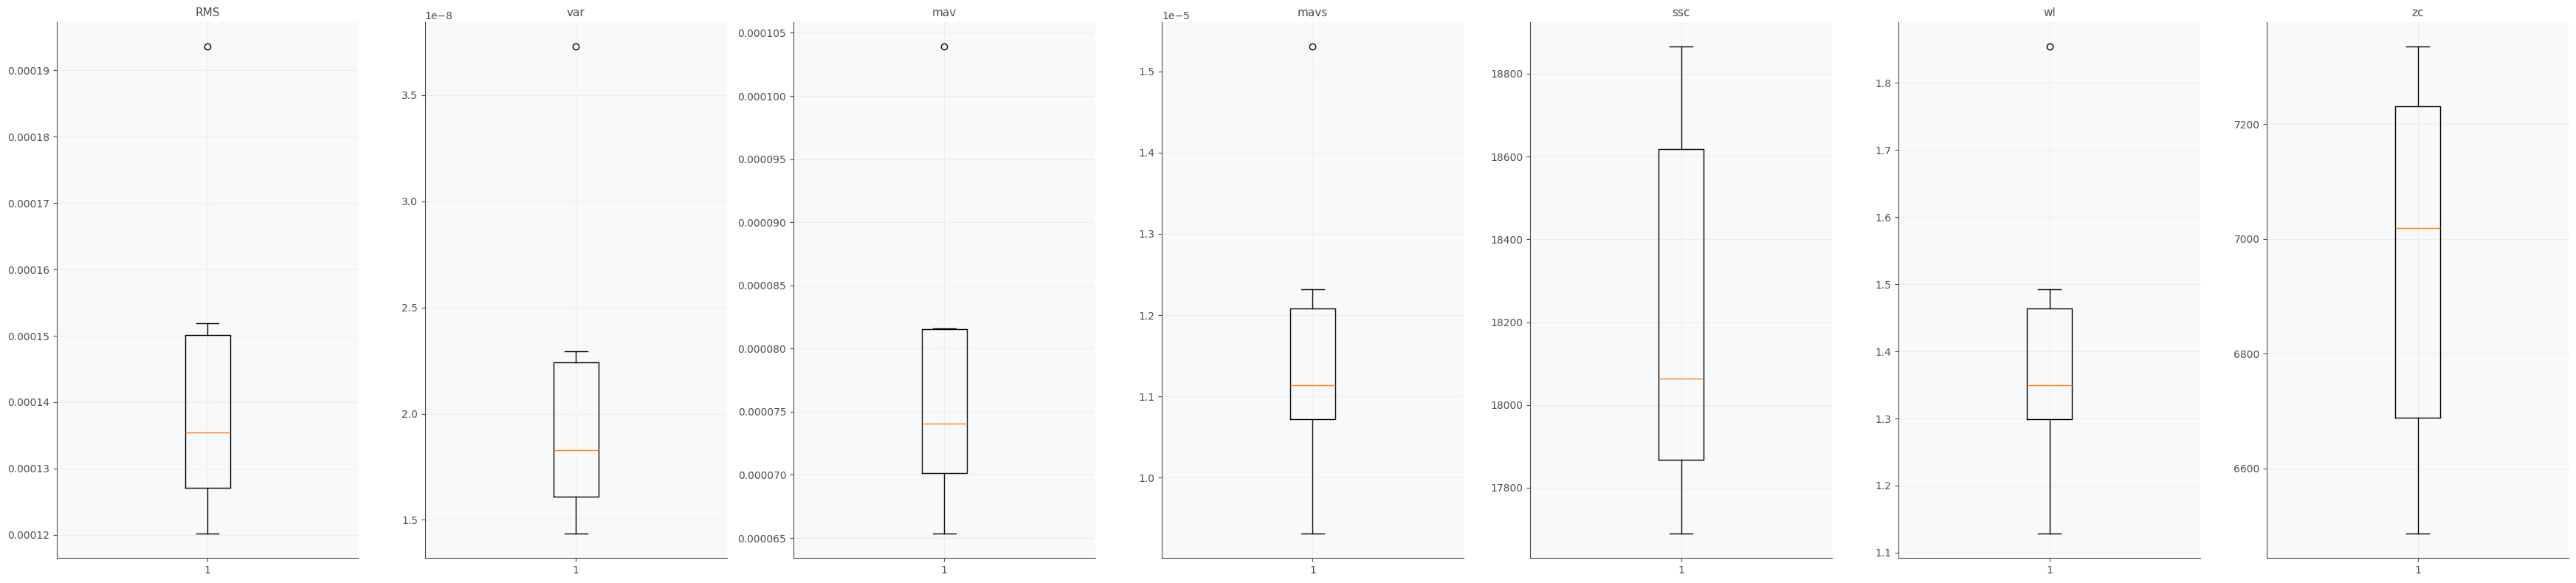

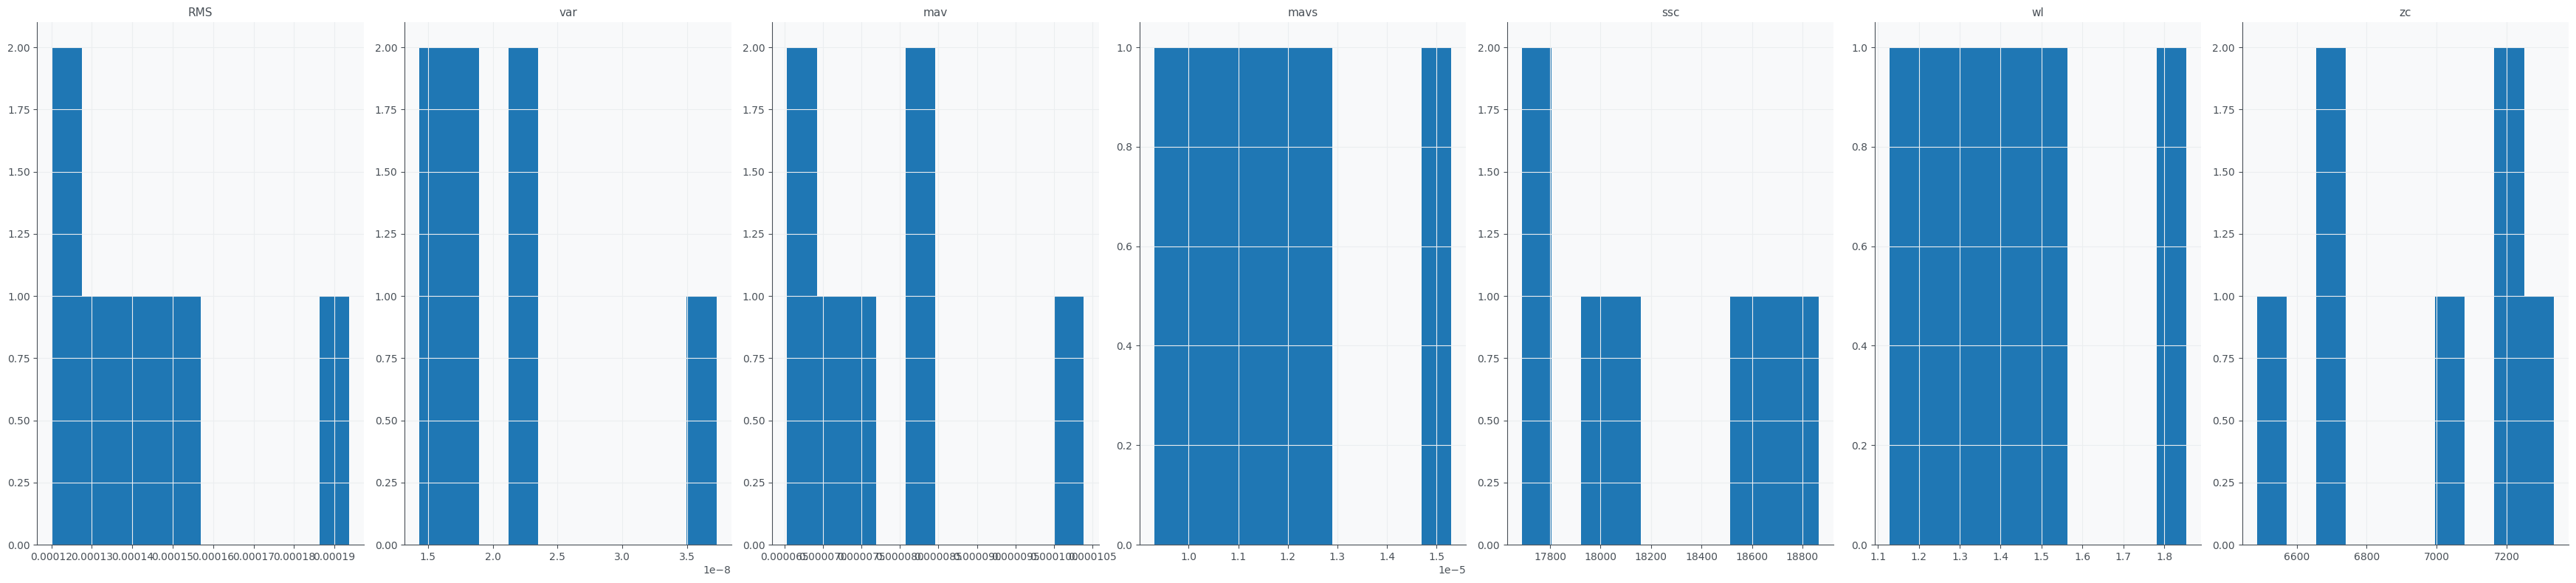

In [87]:
# Sin operador TKEO

list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
for i in range(1,8):
    s1=output2.loc["sujeto1","RMS_C"+str(i)]
    list1.append(s1)
    s2=output2.loc["sujeto1","var_C"+str(i)]
    list2.append(s2)
    s3=output2.loc["sujeto1","mav_C"+str(i)]
    list3.append(s3)
    s4=output2.loc["sujeto1","mavs_C"+str(i)]
    list4.append(s4)
    s5=output2.loc["sujeto1","ssc_C"+str(i)]
    list5.append(s5)
    s6=output2.loc["sujeto1","wl_C"+str(i)]
    list6.append(s6)
    s7=output2.loc["sujeto1","zc_C"+str(i)]
    list7.append(s7)

plt.figure(figsize=(35,8))
plt.subplot(1,7,1)
plt.boxplot(np.array(list1))
plt.title("RMS")
print("media: "+str(np.mean(list1))+"/mediana: "+str(np.median(list1)))
plt.subplot(1,7,2)
plt.boxplot(np.array(list2))
plt.title("var")
print("media: "+str(np.mean(list2))+"/mediana: "+str(np.median(list2)))
plt.subplot(1,7,3)
plt.boxplot(np.array(list3))
plt.title("mav")
print("media: "+str(np.mean(list3))+"/mediana: "+str(np.median(list3)))
plt.subplot(1,7,4)
plt.boxplot(np.array(list4))
plt.title("mavs")
print("media: "+str(np.mean(list4))+"/mediana: "+str(np.median(list4)))
plt.subplot(1,7,5)
plt.boxplot(np.array(list5))
plt.title("ssc")
print("media: "+str(np.mean(list5))+"/mediana: "+str(np.median(list5)))
plt.subplot(1,7,6)
plt.boxplot(np.array(list6))
plt.title("wl")
print("media: "+str(np.mean(list6))+"/mediana: "+str(np.median(list6)))
plt.subplot(1,7,7)
plt.boxplot(np.array(list7))
plt.title("zc")
print("media: "+str(np.mean(list7))+"/mediana: "+str(np.median(list7)))
plt.tight_layout()

list_paciente1_sinTKEO=list1

plt.figure(figsize=(35,8))
plt.subplot(1,7,1)
plt.hist(np.array(list1))
plt.title("RMS")
plt.subplot(1,7,2)
plt.hist(np.array(list2))
plt.title("var")
plt.subplot(1,7,3)
plt.hist(np.array(list3))
plt.title("mav")
plt.subplot(1,7,4)
plt.hist(np.array(list4))
plt.title("mavs")
plt.subplot(1,7,5)
plt.hist(np.array(list5))
plt.title("ssc")
plt.subplot(1,7,6)
plt.hist(np.array(list6))
plt.title("wl")
plt.subplot(1,7,7)
plt.hist(np.array(list7))
plt.title("zc")
plt.tight_layout()


INFORME 

a. Hacer un breve resumen sobre la electromiografía y las características de esta señal. 

La electromiografía (EMG) es una técnica relacionada con la detección, análisis y uso de la señal eléctrica que se genera en la contracción muscular. La señal electromiográfica permite construir el electromiograma, que corresponde a la suma temporal y espacial de los potenciales de acción de las unidades motoras durante la actividad muscular [1][2].
Existen dos técnicas de EMG: la EMG invasiva y la EMG de superficie. La EMG invasiva logra obtener el registro del potencial de acción generado por una unidad motora en particular. Para esto, se inserta un electrodo a nivel intramuscular por medio de agujas. Por su parte, la EMG de superficie permite estudiar la actividad bioeléctrica del músculo mediante el registro de las diferencias de potencial registradas en la superficie de la piel . Se basa en el uso de electrodos superficiales alámbricos o inalámbricos que son ubicados directamente sobre la piel del músculo que se quiere evaluar. Si bien esta técnica no es capaz de captar la señal de una sola unidad motora, se utiliza para el estudio del comportamiento promedio de un músculo o grupo muscular [1].
La amplitud de la señal EMG es de naturaleza estocástica (aleatoria) y puede representarse razonablemente mediante una función de distribución gausiana. La amplitud de la señal puede variar de 0 a 10 mV (pico a pico) o 0 a 1,5 mV (rms). La energía utilizable de la señal se limita al rango de frecuencia de 0 a 500 Hz, estando la energía dominante en el rango de 50 a 150 Hz [3].


b. Hacer una breve descripción del operador de TKEO, qué información entrega y cómo se interpreta con los datos entregados

El operador de energía Teager-Kaiser (TKEO) se utiliza como parte del acondicionamiento de señales electromiográficas (EMG) para mejorar la precisión en la detección del inicio de la actividad muscular [4][5]. Este operador proporciona una medida de la energía instantánea presente en una señal en función de sus características temporales [6]. El TKEO se calcula multiplicando cada punto de la señal por el cuadrado de las diferencias entre puntos adyacentes. Matemáticamente, para una señal discreta x(n) el TKEO se define como:
TKEO(n)=x(n)×x(n+1)×x(n−1)
En el contexto de los datos entregados, al aplicar el TKEO a las señales EMG capturadas durante la realización de los gestos, se podría identificar patrones significativos de activación muscular asociados con cada gesto realizado.




c. Discusión de las diferencias en los grupos usando las gráficas obtenidas. Seleccione el tipo de representación que mejor le permita describir la información 


Entre las pruebas de estadistica descriptiva aplicada se puede observar una tendencia a una mayor normalidad en las distribuciones de caja-bigotes al aplicar el filtro TKEO, debido a que no se encuntran tan faltas de simetria como las distribuciones donde no se a empleado el filtro TKEO (hay una mayor dispersion aparente de los datos), es en parte por ese motivo que la mejor descripcion de la informacion suministrada se da despues de aplicar el filtro, ademas, el mejor tipo de representacion de la informacion resulta ser la caja de bigotes, ya que el histograma no evidencia una tendencia clara

d. Planteamiento de las hipótesis nulas y alternativas, selección del tipo de prueba (paramétrica o no paramétrica) y discusión de los resultados.

In [85]:
# Prueba de NORMALIDAD , Kolmogorov-Smirnov
valueTKEO=stats.kstest(list_paciente1_TKEO,"norm")
valuesinTKEO=stats.kstest(list_paciente1_sinTKEO,"norm")
print("VALOR P, PRUEBAS DE NORMALIDAD")
print(f"P value muestra TKEO: {valueTKEO.pvalue}")
print(f"P value muestra sinTKEO: {valuesinTKEO.pvalue}")

# Prueba de HOMOCEDASTICIDAD, levene
valuel=stats.levene(list_paciente1_TKEO,list_paciente1_sinTKEO)
print("VALOR P, PRUEBAS DE HOMOCEDASTICIDAD")
print(f" P value comparación 1: {valuel.pvalue}")

VALOR P, PRUEBAS DE NORMALIDAD
P value muestra TKEO: [0.03839173]
P value muestra sinTKEO: [0.03836184]
VALOR P, PRUEBAS DE HOMOCEDASTICIDAD
 P value comparación 1: [0.03630249]


Teniendo en cuenta que no se cumple el supuesto de Normalidad ya que en cada caso el P value es menor al nivel de significancia establecido (0.05), se procedió a hacer un análisis no paramétrico empleando la prueba de Mann-Whitney . 

se establece entonces
H0: La diferencia entre las medianas de los valores RMS de la señal EMG con el eperador y sin el operador (TKEO) no es estadisticamente significativa
H1: La diferencia entre las medianas de los valores RMS de la señal EMG con el eperador y sin el operador (TKEO) es estadisticamente significativo

In [86]:
# prueba Mann-Whitney 
valuem=stats.mannwhitneyu(list_paciente1_TKEO,list_paciente1_sinTKEO)

print("VALOR P, PRUEBA Mann-Whitney ")
print(f" P value comparación 1: {valuem.pvalue}")

VALOR P, PRUEBA Mann-Whitney 
 P value comparación 1: [0.00058275]


El P value obtenido en cada caso es menor al nivel de significancia establecido (0.05) por lo que la hipotesis nula se rechaza, es decir la diferencia entre las medianas de los valores RMS de la señal EMG con el eperador y sin el operador (TKEO)es estadisticamente significativa.

e. Conclusiones

- Se puede preferir utilizar diagramas de caja sobre histogramas cuando se necesita una visualización rápida y eficiente de la distribución general de los datos, especialmente cuando se trabaja con conjuntos de datos grandes o se necesita comparar varias distribuciones simultáneamente. 

- Considerando que las medianas de las características medidas son diferentes entre los dos grupos se puede decir que la aplicación del operador TKEO  tiene un efecto significativo en las características de las señales EMG, lo que indica que puede ser útil para mejorar la calidad o la información extraída de las señales teniendo en cuenta que este operador puede mejorar la detección del inicio de la actividad muscular .


BIBLIOGRAFÍA


[1] Org.co. [En línea]. Disponible en: http://www.scielo.org.co/pdf/sun/v34n3/2011-7531-sun-34-03-753.pdf. [Consultado: 14-mar-2024].
[2] R. Chowdhury, M. Reaz, M. Ali, A. Bakar, K. Chellappan, y T. Chang, “Surface electromyography signal processing and classification techniques”, Sensors (Basel), vol. 13, núm. 9, pp. 12431–12466, 2013.
[3] C. J. De Luca, “SURFACE ELECTROMYOGRAPHY: DETECTION AND RECORDING”, Delsys.com. [En línea]. Disponible en: https://www.delsys.com/downloads/TUTORIAL/semg-detection-and-recording.pdf. [Consultado: 14-mar-2024].
[4] S. Solnik, P. DeVita, P. Rider, B. Long, y T. Hortobágyi, “Teager-Kaiser Operator improves the accuracy of EMG onset detection independent of signal-to-noise ratio”, Acta Bioeng. Biomech., vol. 10, núm. 2, 2008.
[5] S. Solnik, P. Rider, K. Steinweg, P. DeVita, y T. Hortobágyi, “Teager–Kaiser energy operator signal conditioning improves EMG onset detection”, Eur. J. Appl. Physiol., vol. 110, núm. 3, pp. 489–498, 2010.
[6] R. B. Randall y W. A. Smith, “Uses and mis-uses of energy operators for machine diagnostics”, Mech. Syst. Signal Process., vol. 133, núm. 106199, p. 106199, 2019.

